In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datafile = "LoanGrantingCleanedDatasetV6cleaned.csv"
raw_data = pd.read_csv(datafile, header=0)

In [3]:
df = pd.DataFrame(raw_data)
df.describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,4.567100e+04,45671.000000,45671.000000
mean,0.634385,12667.183486,0.247772,720.464562,5.511988,0.640647,57047.915351,0.981936,835.399308,17.788369,15.898842,10.826367,0.162182,12968.232445,2.889284e+04,0.118981,0.023363
std,0.481607,7281.235609,0.431723,27.497862,3.754607,0.650080,20279.752469,0.133184,464.586973,6.903372,23.039119,4.837556,0.465252,11474.688289,2.292603e+05,0.351401,0.236484
min,0.000000,511.000000,0.000000,585.000000,0.000000,0.000000,4033.000000,0.000000,0.000000,3.900000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,7109.500000,0.000000,709.000000,2.000000,0.000000,41048.000000,1.000000,493.440000,13.000000,0.000000,7.000000,0.000000,5615.000000,1.192950e+04,0.000000,0.000000
50%,1.000000,11213.000000,0.000000,729.000000,5.000000,1.000000,55407.000000,1.000000,774.410000,16.500000,0.000000,10.000000,0.000000,10171.000000,1.992100e+04,0.000000,0.000000
75%,1.000000,16923.000000,0.000000,740.000000,10.000000,1.000000,72003.500000,1.000000,1108.655000,21.100000,29.000000,13.000000,0.000000,17043.500000,3.225600e+04,0.000000,0.000000
max,1.000000,35872.000000,1.000000,751.000000,10.000000,2.000000,99999.000000,1.000000,3249.210000,70.500000,176.000000,76.000000,15.000000,332524.000000,3.628434e+07,6.000000,15.000000


In [4]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                       int64
Current Loan Amount             float64
Term                              int64
Credit Score                    float64
Years in current job              int64
Home Ownership                    int64
Annual Income                   float64
Purpose                           int64
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent      int64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit               int64
Bankruptcies                      int64
Tax Liens                         int64
dtype: object

In [5]:
## Create pair-wise scatter plots         
def plot_pairs(data_cols, df):
    import matplotlib.pyplot as plt
    from pandas.tools.plotting import scatter_matrix
    fig = plt.figure(figsize=(36, 36))
    fig.clf()
    ax = fig.gca()
    scatter_matrix(df[data_cols], alpha=0.3, 
               diagonal='kde', ax = ax)
    return 'Done' 

In [6]:
## Function to plot conditioned histograms
def cond_hists(df, data_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in data_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

In [7]:
## Plot categorical variables as box plots
def cond_boxplot(data_cols, df, by_col):
    import numpy as np
    import matplotlib.pyplot as plt
    
    cols = data_cols
    for col in cols:
        if(df[col].dtype in [np.int64, np.int32, np.float64]):                  
            fig = plt.figure(figsize = (5,5))
            fig.clf()
            ax = fig.gca() 
            df.boxplot(column = [col], ax = ax, by = by_col)          
    return('Done') 

In [8]:
ft_cols = df.columns.tolist() # feature columns to plot
ft_cols.remove("Loan Status")
ft_cols.remove("Loan ID")
ft_cols.remove("Customer ID")

In [9]:
cv_cols = list(ft_cols) # columns to convert to logarithm
cv_cols.remove("Purpose")
cv_cols.remove("Term")
cv_cols.remove("Home Ownership")
log_cols = list() # new log columns
for col in cv_cols:
    log_cols.append("LOG_"+col)
    df["LOG_"+col] = df[col].apply(lambda x: np.log(x) if x>0 else 0)

In [10]:
df.describe()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,...,LOG_Annual Income,LOG_Monthly Debt,LOG_Years of Credit History,LOG_Months since last delinquent,LOG_Number of Open Accounts,LOG_Number of Credit Problems,LOG_Current Credit Balance,LOG_Maximum Open Credit,LOG_Bankruptcies,LOG_Tax Liens
count,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,...,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000,45671.000000
mean,0.634385,12667.183486,0.247772,720.464562,5.511988,0.640647,57047.915351,0.981936,835.399308,17.788369,...,10.879583,6.529261,2.807501,1.470864,2.283788,0.014448,9.063136,9.810590,0.004368,0.004057
std,0.481607,7281.235609,0.431723,27.497862,3.754607,0.650080,20279.752469,0.133184,464.586973,6.903372,...,0.398537,0.731695,0.378601,1.738056,0.453862,0.116259,1.193095,1.107600,0.061681,0.066237
min,0.000000,511.000000,0.000000,585.000000,0.000000,0.000000,4033.000000,0.000000,0.000000,3.900000,...,8.302266,-0.941609,1.360977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7109.500000,0.000000,709.000000,2.000000,0.000000,41048.000000,1.000000,493.440000,13.000000,...,10.622497,6.201401,2.564949,0.000000,1.945910,0.000000,8.633197,9.386770,0.000000,0.000000
50%,1.000000,11213.000000,0.000000,729.000000,5.000000,1.000000,55407.000000,1.000000,774.410000,16.500000,...,10.922461,6.652101,2.803360,0.000000,2.302585,0.000000,9.227296,9.899530,0.000000,0.000000
75%,1.000000,16923.000000,0.000000,740.000000,10.000000,1.000000,72003.500000,1.000000,1108.655000,21.100000,...,11.184470,7.010903,3.049273,3.367296,2.564949,0.000000,9.743524,10.381459,0.000000,0.000000
max,1.000000,35872.000000,1.000000,751.000000,10.000000,2.000000,99999.000000,1.000000,3249.210000,70.500000,...,11.512915,8.086167,4.255613,5.170484,4.330733,2.708050,12.714467,17.406897,1.791759,2.708050


In [11]:
df.corr()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,...,LOG_Annual Income,LOG_Monthly Debt,LOG_Years of Credit History,LOG_Months since last delinquent,LOG_Number of Open Accounts,LOG_Number of Credit Problems,LOG_Current Credit Balance,LOG_Maximum Open Credit,LOG_Bankruptcies,LOG_Tax Liens
Loan Status,1.000000,-0.100308,-0.193739,0.263947,0.015284,0.041230,0.084603,0.041772,-0.055271,0.026376,...,0.081352,-0.054234,0.033678,0.002344,-0.026692,-0.008221,-0.027557,0.034876,0.002022,-0.008038
Current Loan Amount,-0.100308,1.000000,0.445143,-0.236654,0.146285,0.100388,0.449178,-0.000018,0.396514,0.120829,...,0.452328,0.354770,0.143288,-0.015662,0.201827,-0.025292,0.327973,0.293915,-0.028579,0.003166
Term,-0.193739,0.445143,1.000000,-0.482620,0.082432,0.064633,0.147822,-0.008983,0.180589,0.039770,...,0.160183,0.160997,0.052364,-0.001909,0.088049,-0.008893,0.117346,0.095367,-0.004551,-0.000400
Credit Score,0.263947,-0.236654,-0.482620,1.000000,-0.019575,0.035985,0.004738,0.072627,-0.120825,0.086392,...,0.002289,-0.100840,0.095265,-0.076604,-0.019041,-0.029706,-0.030190,0.089128,-0.023036,-0.011117
Years in current job,0.015284,0.146285,0.082432,-0.019575,1.000000,0.131090,0.209303,0.031194,0.173800,0.142453,...,0.230693,0.169401,0.182421,0.051088,0.079147,0.002471,0.116899,0.100433,-0.003784,0.007600
Home Ownership,0.041230,0.100388,0.064633,0.035985,0.131090,1.000000,0.122153,0.014550,0.097121,0.166528,...,0.120407,0.079532,0.179206,0.034272,0.093827,0.008341,0.081361,0.112072,0.000430,0.009048
Annual Income,0.084603,0.449178,0.147822,0.004738,0.209303,0.122153,1.000000,-0.010772,0.539838,0.168485,...,0.969621,0.459093,0.203047,0.083223,0.227931,0.009696,0.239874,0.234532,-0.005238,0.019269
Purpose,0.041772,-0.000018,-0.008983,0.072627,0.031194,0.014550,-0.010772,1.000000,0.042208,0.004470,...,-0.007553,0.059070,0.004568,-0.000137,0.051526,-0.003637,0.067752,0.042567,-0.002075,0.001425
Monthly Debt,-0.055271,0.396514,0.180589,-0.120825,0.173800,0.097121,0.539838,0.042208,1.000000,0.138599,...,0.537688,0.872604,0.165286,0.041728,0.442404,-0.013225,0.387910,0.291892,-0.020204,0.010580
Years of Credit History,0.026376,0.120829,0.039770,0.086392,0.142453,0.166528,0.168485,0.004470,0.138599,1.000000,...,0.167421,0.118563,0.963649,0.131335,0.111814,0.024070,0.149611,0.175370,0.012026,0.007378


'Done'

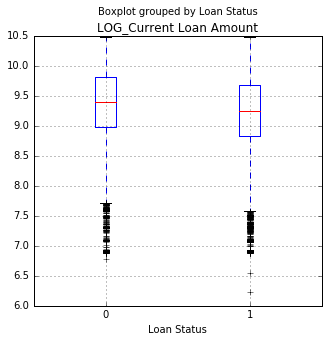

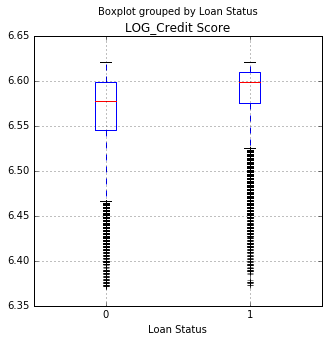

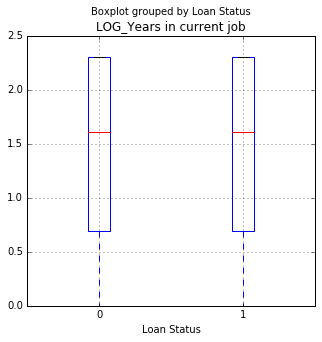

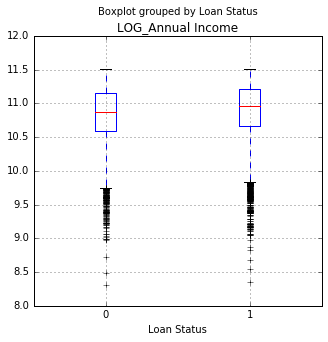

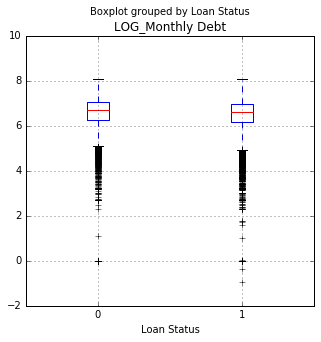

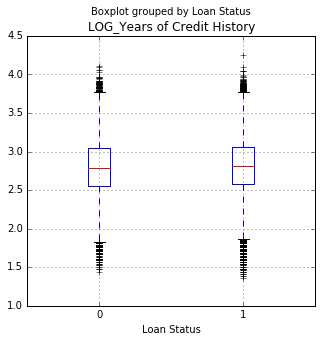

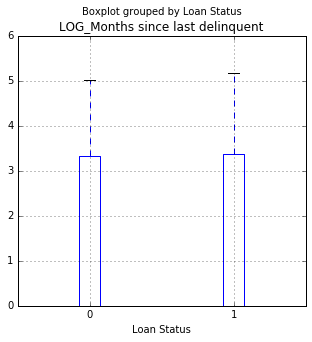

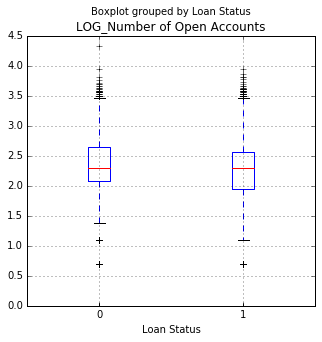

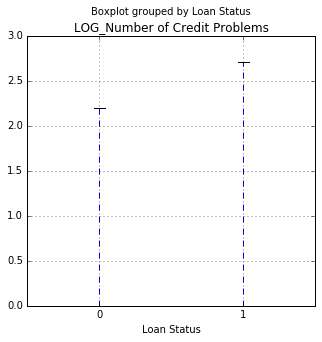

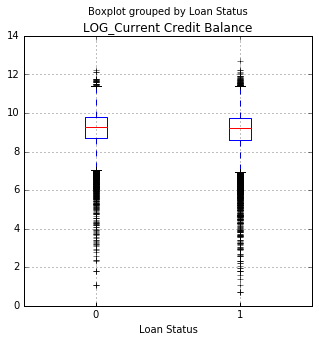

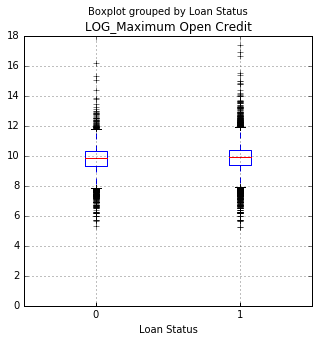

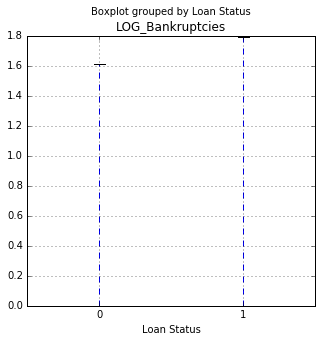

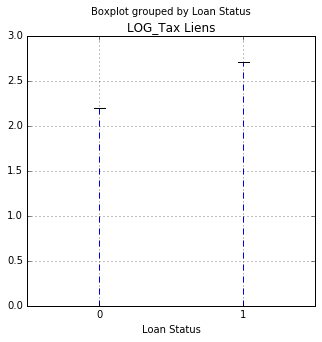

In [12]:
cond_boxplot(log_cols, df, "Loan Status")

'Loan Status'

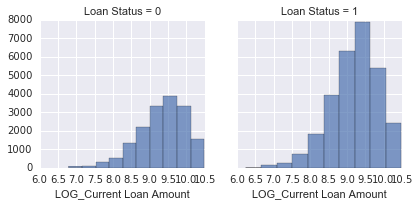

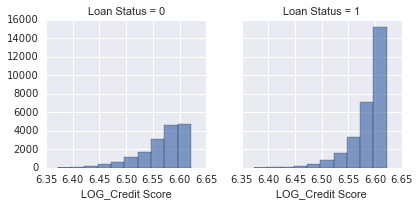

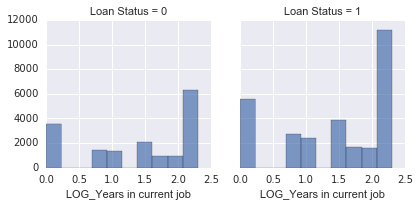

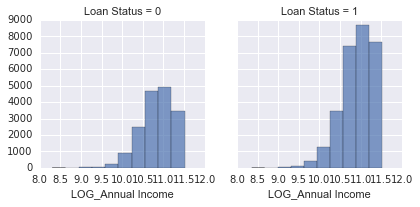

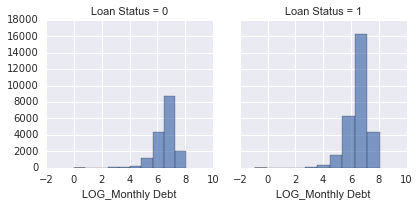

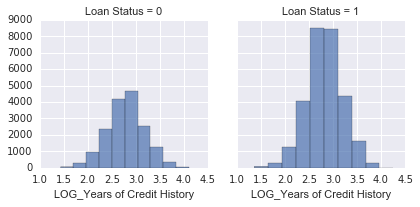

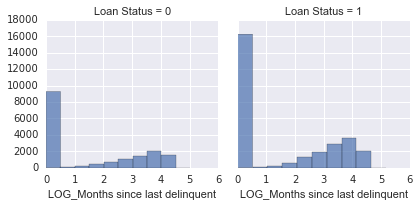

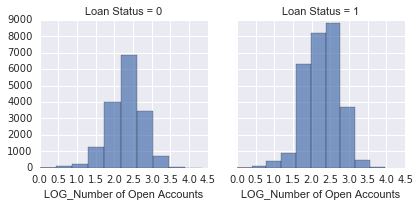

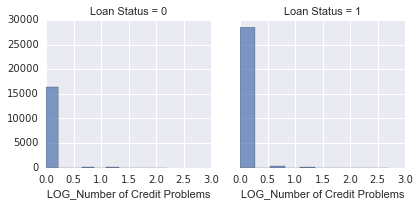

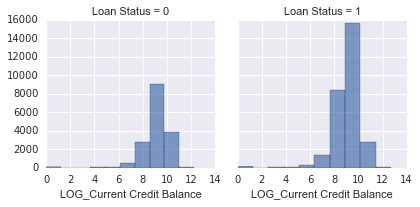

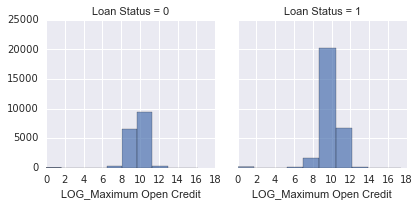

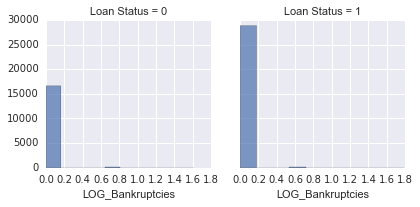

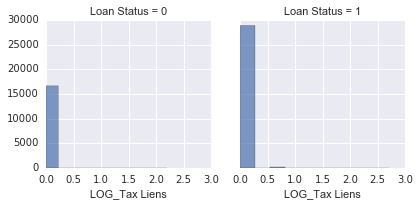

In [14]:
cond_hists(df, log_cols, "Loan Status")

/Users/Jerry/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


'Done'

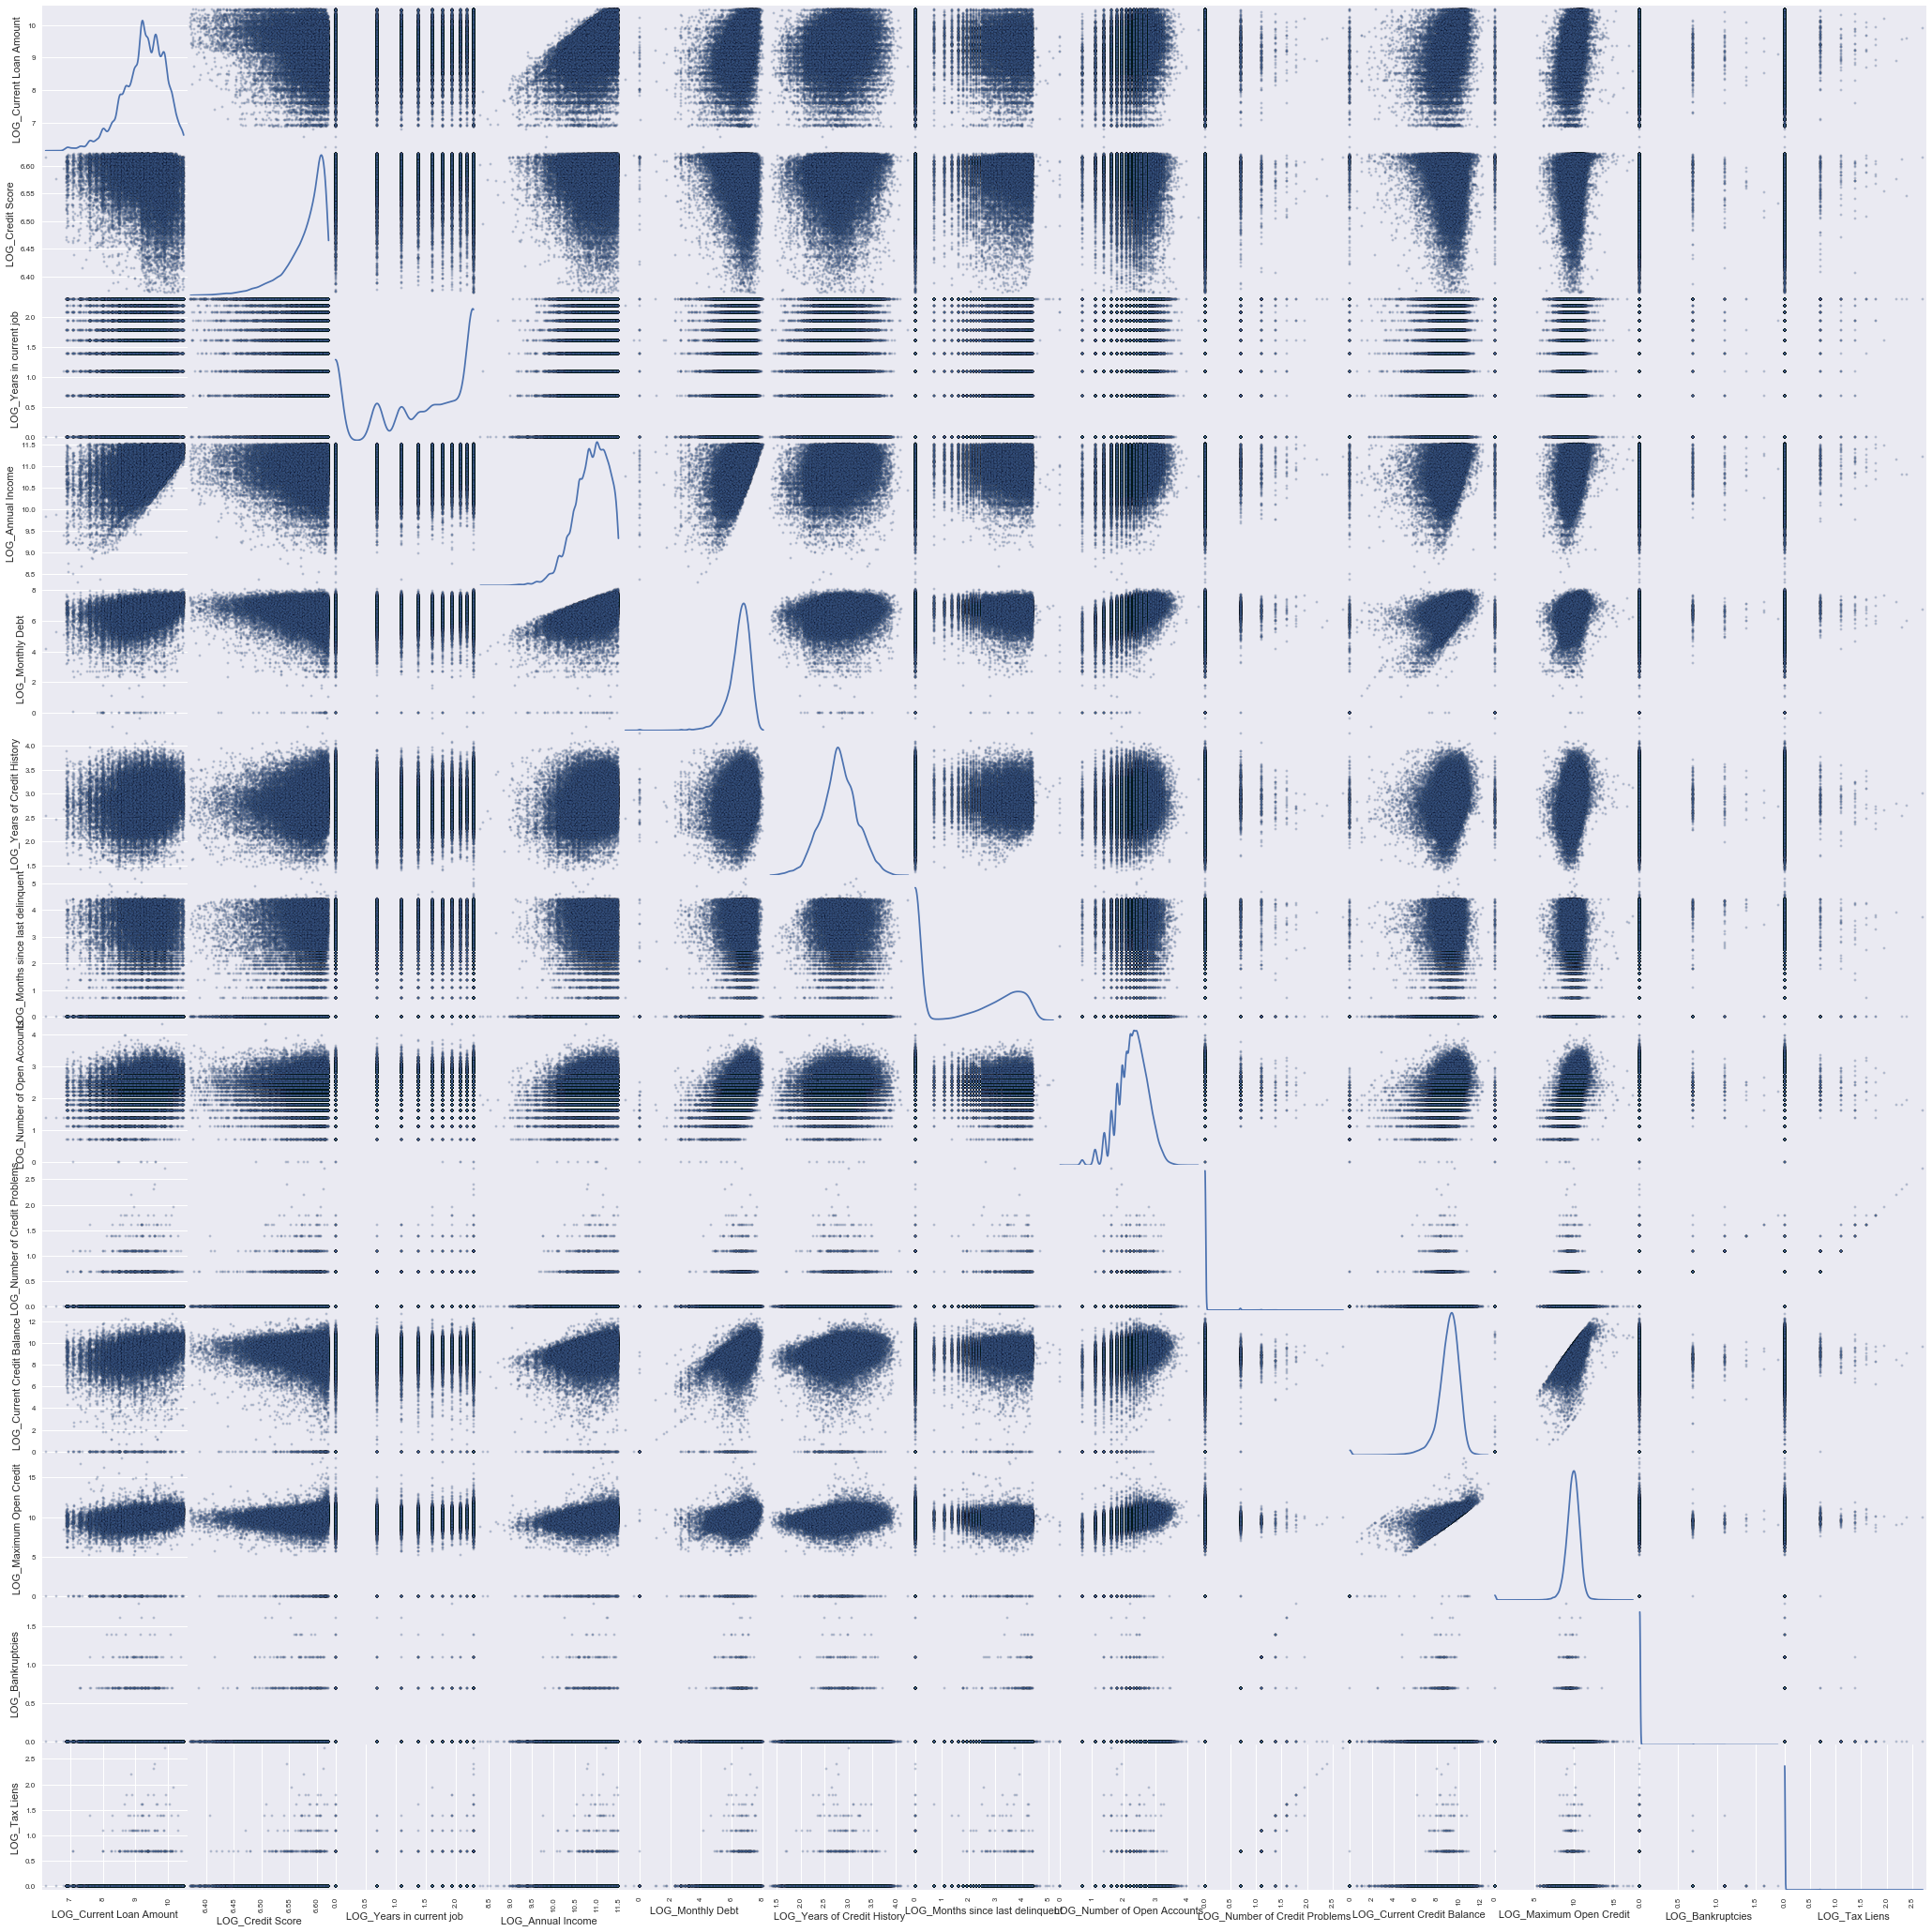

In [15]:
plot_pairs(log_cols, df)

In [16]:
df.to_csv("LoanGrantingCleanedDatasetV6scaled.csv", index=False)